<a href="https://colab.research.google.com/github/yahooshiken/rinko/blob/master/ch2-perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第2章 分類問題 単純な機械学習アルゴリズムのトレーニング

## 本章のゴール
- 初期の機械学習アルゴリズムであるパーセプトロンと ADALINE を分類問題に適用する。
- Iris データセットに含まれているアヤメの品種を分類できるように、パーセプトロンを実装する。
- ADALINE を用いた最適化の基礎について理解する。

## パーセプトロン
Frank Rosenblatt は1957年にMCPニューロンモデルに基づくパーセプトロンの学習則に関する最初の概念を発表した。そのアルゴリズムとは、最適な重み係数を自動的に学習した後、入力信号と掛け合わせ、ニューロンが発火するかを判断するものだった。

## 人工ニューロンの定義
形式的に、人工ニューロンの概念を二値分類タスクとして捉える。分類すべき2つのクラスを $1$、$-1$ とすると決定関数 $\phi(z)$ を定義でき、特定の入力値 $\boldsymbol{x}$ と対応する重みベクトル $\boldsymbol{w}$ の線形結合を引数として受け取る。すなわち、決定関数 $\phi(z)$ の引数 $z$ は以下の形式で表すことができる。

$z = w_1x_1 + w_2x_2 + \dots + w_mx_m$

ここで、サンプル $x^{(i)}$ に対する総入力 $z$ が、指定されたしきい値 $\theta$ よりも大きい場合、$1$ のクラスを予測し、そうでない場合は $-1$ のクラスを予測する。パーセプトロンのアルゴリズムでは、決定関数$\phi$は、単位ステップ関数が用いられる。

$\phi(z) = \begin{cases} 1 & (z \geq \theta)\\ -1 & (z \leq \theta) \end{cases}$

また $w_0 = -\theta$、$x_0 = 1$ とすると

$z = w_0x_0 + w_1x_1 + \dots + w_mx_m = \boldsymbol{w}^T\boldsymbol{x}$

$\phi(z) = \begin{cases} 1 & (z \geq 0)\\ -1 & (z \leq 0) \end{cases}$

## パーセプトロンの学習規則
1. 重みを 0 または値の小さい乱数で初期化する
2. トレーニングサンプル $\boldsymbol{x}^{(i)}$ ごとに次の手順を実行する
    1. 出力値 $\hat{y}$ を計算する
    2. 重みを更新する
    
ここで、出力値は決定関数によって予測されるクラスラベルである。重みベクトル $\boldsymbol{w}$ の各重み $w_j$ は同時に更新するが、より正式には次のように記述する。

$$
w_j = w_j + \Delta w_j \\
\Delta w_j = \eta (y^{(i)} - \hat{y}^{(i)})x_j^{(i)}
$$

ここで、 $\eta$ は学習率であり、 $y^{(i)}$ は $i$ 番目のトレーニングサンプルの真のクラスラベル、$\hat{y}^{(i)}$ は予測されたクラスラベルである。

パーセプトロンがクラスラベルを正しく予測する場合、すなわち $y^{(i)} = \hat{y}^{(i)}$ の場合、重みは変化しない（$\Delta w_j = 0$）。予測が間違っていた場合のみ、目的とする正または負のクラスの方向に向かうように重みが計算される。

## パーセプトロンの収束

パーセプトロンの収束が保証されるのは、
- 2つのクラスが線形分離可能
- 学習率が十分に小さい
場合に限られる。線形分離可能でない場合にはエポックや誤分類の最大数を指定する。


In [229]:
import numpy as np

class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit (self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      
      self.errors_.append(errors)
    
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]


  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)


In [230]:
import os
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris

iris_data = load_iris()
print(iris_data.keys())

X = pd.DataFrame(iris_data.data)[:100]
X = X.iloc[:, [0, 2]].values

y = pd.DataFrame(iris_data.target)[:100]
y = y.replace({0: 1, 1: -1}).values.flatten()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


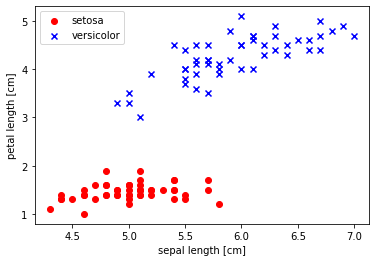

In [231]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

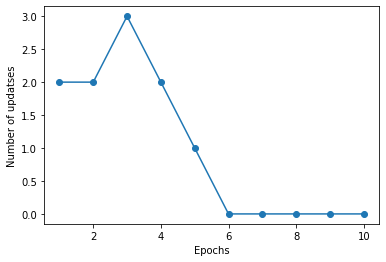

In [232]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updatses')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [255]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'o', '^', 'v', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    color_map = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=color_map)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            label=cl,
            marker=markers[idx],
            edgecolor='black')
    

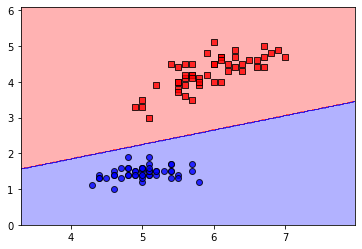

In [256]:
plot_decision_regions(X, y, classifier=ppn)
plt.show()